In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, models, datasets

# Define the model for CIFAR-10
class CIFAR10Classifier(nn.Module):
    def __init__(self, num_classes):
        super(CIFAR10Classifier, self).__init__()
        resnet = models.resnet18(pretrained=True)  # Use a smaller ResNet for CIFAR-10
        self.features = nn.Sequential(*list(resnet.children())[:-1])
        self.classifier = nn.Linear(resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = nn.functional.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters for training CIFAR-10
num_epochs = 20
batch_size = 32
learning_rate = 0.001

# Load the CIFAR-10 dataset
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Assuming you have a separate validation dataset
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

cifar10_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
cifar10_val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=val_transform)

cifar10_train_loader = DataLoader(dataset=cifar10_train_dataset, batch_size=batch_size, shuffle=True)
cifar10_val_loader = DataLoader(dataset=cifar10_val_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer for CIFAR-10
cifar10_model = CIFAR10Classifier(num_classes=10).to(device)
criterion_cifar10 = nn.CrossEntropyLoss()
optimizer_cifar10 = optim.Adam(cifar10_model.parameters(), lr=learning_rate)

# Training and validation loop for CIFAR-10
for epoch in range(num_epochs):
    # Training
    cifar10_model.train()
    correct_train = 0
    total_train = 0

    for images, labels in cifar10_train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = cifar10_model(images)
        loss = criterion_cifar10(outputs, labels)

        # Backward pass and optimization
        optimizer_cifar10.zero_grad()
        loss.backward()
        optimizer_cifar10.step()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # Validation
    cifar10_model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images_val, labels_val in cifar10_val_loader:
            images_val, labels_val = images_val.to(device), labels_val.to(device)
            outputs_val = cifar10_model(images_val)
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()

    val_accuracy = 100 * correct_val / total_val

    print(f'CIFAR-10 Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%')

# Save the trained CIFAR-10 model
torch.save(cifar10_model.state_dict(), 'cifar10_classifier.pth')
print("CIFAR-10 Model saved.")

100%|██████████| 170498071/170498071 [00:12<00:00, 13442201.82it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.5MB/s]


CIFAR-10 Epoch [1/20], Loss: 0.8118, Training Accuracy: 54.63%, Validation Accuracy: 78.01%
CIFAR-10 Epoch [2/20], Loss: 0.8248, Training Accuracy: 66.25%, Validation Accuracy: 82.63%
CIFAR-10 Epoch [3/20], Loss: 0.6196, Training Accuracy: 70.23%, Validation Accuracy: 82.69%
CIFAR-10 Epoch [4/20], Loss: 0.7850, Training Accuracy: 73.13%, Validation Accuracy: 86.26%
CIFAR-10 Epoch [5/20], Loss: 0.4461, Training Accuracy: 74.52%, Validation Accuracy: 87.70%
CIFAR-10 Epoch [6/20], Loss: 0.9391, Training Accuracy: 76.43%, Validation Accuracy: 88.72%
CIFAR-10 Epoch [7/20], Loss: 0.2880, Training Accuracy: 77.51%, Validation Accuracy: 88.46%
CIFAR-10 Epoch [8/20], Loss: 0.5215, Training Accuracy: 78.60%, Validation Accuracy: 89.37%
CIFAR-10 Epoch [9/20], Loss: 0.6834, Training Accuracy: 79.31%, Validation Accuracy: 89.95%
CIFAR-10 Epoch [10/20], Loss: 0.7645, Training Accuracy: 80.20%, Validation Accuracy: 90.10%
CIFAR-10 Epoch [11/20], Loss: 0.4735, Training Accuracy: 80.98%, Validation Acc

In [3]:
import torch
import torch.nn as nn
from torchvision import models

class CIFAR10Classifier(nn.Module):
    def __init__(self, num_classes):
        super(CIFAR10Classifier, self).__init__()
        resnet = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-2])  # Exclude the last two layers
        self.classifier = nn.Linear(resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def load_pretrained(model, pretrained_dict):
    model_dict = model.state_dict()

    # Filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == pretrained_dict[k].shape}

    # Update the model's dictionary with the new one
    model_dict.update(pretrained_dict)

    # Load the modified state dict
    model.load_state_dict(model_dict)

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = CIFAR10Classifier(num_classes=10).to(device)

# Load only the layers with matching names and sizes
pretrained_dict = torch.load('cifar10_classifier.pth')
load_pretrained(model, pretrained_dict)

model.eval()

CIFAR10Classifier(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): 

Files already downloaded and verified


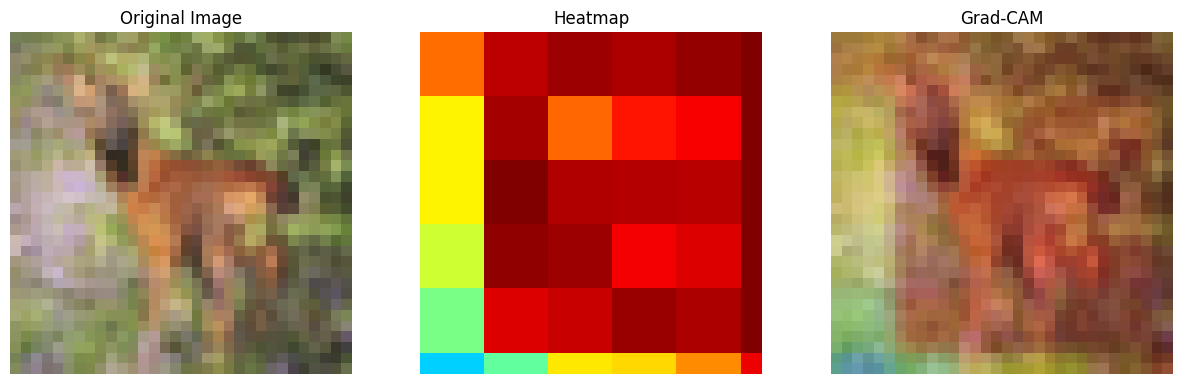

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models, datasets
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Define the model
class CIFAR10Classifier(nn.Module):
    def __init__(self, num_classes):
        super(CIFAR10Classifier, self).__init__()
        resnet = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-2])  # Exclude the last two layers
        self.classifier = nn.Linear(resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def load_pretrained(model, pretrained_dict):
    model_dict = model.state_dict()

    # Filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == pretrained_dict[k].shape}

    # Update the model's dictionary with the new one
    model_dict.update(pretrained_dict)

    # Load the modified state dict
    model.load_state_dict(model_dict)

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = CIFAR10Classifier(num_classes=10).to(device)

# Load only the layers with matching names and sizes
pretrained_dict = torch.load('cifar10_classifier.pth')
load_pretrained(model, pretrained_dict)

model.eval()

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the backward and forward hooks
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

def forward_hook(module, input, output):
    global activations
    activations = output

# Identify the last convolutional layer in your model
last_conv_layer = None
for layer in reversed(list(model.features.children())):
    if isinstance(layer, nn.Conv2d):
        last_conv_layer = layer
        break

# Register hooks on the last convolutional layer
backward_hook = last_conv_layer.register_full_backward_hook(backward_hook)
forward_hook = last_conv_layer.register_forward_hook(forward_hook)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

cifar10_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
cifar10_test_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=1, shuffle=True)

# Get an image from the data loader
for images, labels in cifar10_test_loader:
    # Take the first image from the batch
    img_tensor = images[0].to(device)
    label = labels[0].item()

    # Add batch dimension to the input tensor
    img_tensor = img_tensor.unsqueeze(0)

    # Perform forward and backward pass
    output = model(img_tensor)
    output_scalar = output.max()  # Reduce the output to a scalar value
    output_scalar.backward()

    # Unregister hooks
    backward_hook.remove()
    forward_hook.remove()

    # Pool the gradients across the channels
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3], keepdim=True)

    # Weight the channels by corresponding gradients
    for i in range(activations.size()[1]):
        activations[:, i, :, :] *= pooled_gradients[0, i, :, :]

    # Average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # ReLU on top of the heatmap
    heatmap = F.relu(heatmap)

    # Normalize the heatmap
    heatmap /= torch.max(heatmap)

    # Convert to NumPy array
    heatmap_np = heatmap.detach().cpu().numpy()

    # Resize the heatmap to match the original image size
    original_image_size = img_tensor.shape[2:]  # Assuming the input size is (C, H, W)
    heatmap_resized = cv2.resize(heatmap_np, (original_image_size[1], original_image_size[0]))

    # Convert heatmap to the range [0, 255]
    heatmap_rescaled = (heatmap_resized * 255).astype(np.uint8)

    # Create a grid of squares based on heatmap values
    heatmap_colored = np.zeros_like(heatmap_np, dtype=np.uint8)
    size = 3  # Adjust the square size as needed

    for i in range(0, heatmap_colored.shape[0], size):
        for j in range(0, heatmap_colored.shape[1], size):
            value = torch.mean(heatmap[i:i+size, j:j+size])
            heatmap_colored[i:i+size, j:j+size] = int(value * 255)

    # Convert the heatmap to the same data type and number of channels as the original image
    heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap_colored, (original_image_size[1], original_image_size[0]))

    # Convert the original image to the same data type as the heatmap_colored
    img = (img_tensor.squeeze().cpu().numpy().transpose(1, 2, 0) * 255).astype(np.uint8)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(img, 0.7, heatmap_resized, 0.3, 0)

    # Display the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_colored, cmap='viridis')  # Use any colormap you prefer
    plt.title('Heatmap')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.show()

    # Break after processing one image
    break

Files already downloaded and verified


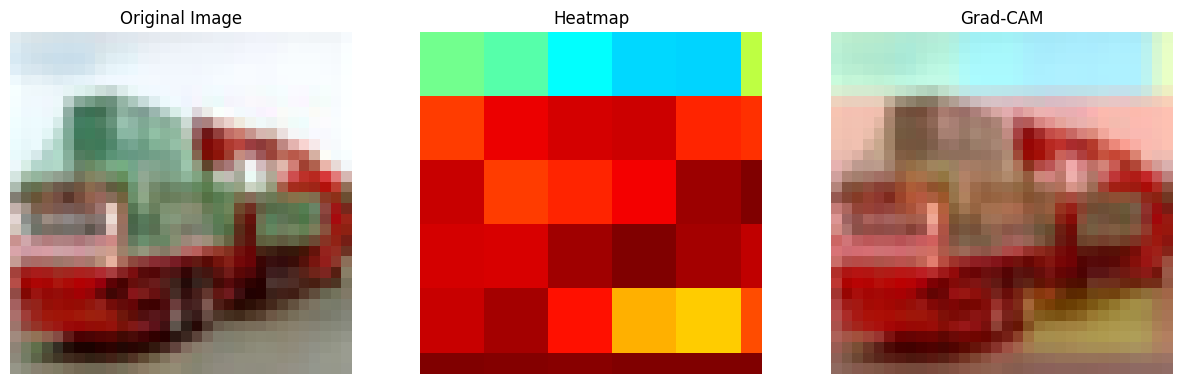

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models, datasets
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Define the model
class CIFAR10Classifier(nn.Module):
    def __init__(self, num_classes):
        super(CIFAR10Classifier, self).__init__()
        resnet = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-2])  # Exclude the last two layers
        self.classifier = nn.Linear(resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def load_pretrained(model, pretrained_dict):
    model_dict = model.state_dict()

    # Filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == pretrained_dict[k].shape}

    # Update the model's dictionary with the new one
    model_dict.update(pretrained_dict)

    # Load the modified state dict
    model.load_state_dict(model_dict)

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = CIFAR10Classifier(num_classes=10).to(device)

# Load only the layers with matching names and sizes
pretrained_dict = torch.load('cifar10_classifier.pth')
load_pretrained(model, pretrained_dict)

model.eval()

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the backward and forward hooks
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

def forward_hook(module, input, output):
    global activations
    activations = output

# Identify the last convolutional layer in your model
last_conv_layer = None
for layer in reversed(list(model.features.children())):
    if isinstance(layer, nn.Conv2d):
        last_conv_layer = layer
        break

# Register hooks on the last convolutional layer
backward_hook = last_conv_layer.register_full_backward_hook(backward_hook)
forward_hook = last_conv_layer.register_forward_hook(forward_hook)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

cifar10_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
cifar10_test_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=1, shuffle=True)

# Get an image from the data loader
for images, labels in cifar10_test_loader:
    # Take the first image from the batch
    img_tensor = images[0].to(device)
    label = labels[0].item()

    # Add batch dimension to the input tensor
    img_tensor = img_tensor.unsqueeze(0)

    # Perform forward and backward pass
    output = model(img_tensor)
    output_scalar = output.max()  # Reduce the output to a scalar value
    output_scalar.backward()

    # Unregister hooks
    backward_hook.remove()
    forward_hook.remove()

    # Pool the gradients across the channels
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3], keepdim=True)

    # Weight the channels by corresponding gradients
    for i in range(activations.size()[1]):
        activations[:, i, :, :] *= pooled_gradients[0, i, :, :]

    # Average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # ReLU on top of the heatmap
    heatmap = F.relu(heatmap)

    # Normalize the heatmap
    heatmap /= torch.max(heatmap)

    # Convert to NumPy array
    heatmap_np = heatmap.detach().cpu().numpy()

    # Resize the heatmap to match the original image size
    original_image_size = img_tensor.shape[2:]  # Assuming the input size is (C, H, W)
    heatmap_resized = cv2.resize(heatmap_np, (original_image_size[1], original_image_size[0]))

    # Convert heatmap to the range [0, 255]
    heatmap_rescaled = (heatmap_resized * 255).astype(np.uint8)

    # Create a grid of squares based on heatmap values
    heatmap_colored = np.zeros_like(heatmap_np, dtype=np.uint8)
    size = 3  # Adjust the square size as needed

    for i in range(0, heatmap_colored.shape[0], size):
        for j in range(0, heatmap_colored.shape[1], size):
            value = torch.mean(heatmap[i:i+size, j:j+size])
            heatmap_colored[i:i+size, j:j+size] = int(value * 255)

    # Convert the heatmap to the same data type and number of channels as the original image
    heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap_colored, (original_image_size[1], original_image_size[0]))

    # Convert the original image to the same data type as the heatmap_colored
    img = (img_tensor.squeeze().cpu().numpy().transpose(1, 2, 0) * 255).astype(np.uint8)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(img, 0.7, heatmap_resized, 0.3, 0)

    # Display the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_colored, cmap='viridis')  # Use any colormap you prefer
    plt.title('Heatmap')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.show()

    # Break after processing one image
    break